In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import io
import os
import re

In [2]:
# relevant_path = %pwd
# included_extensions=['.mat']
# included_structs = ['CI_table', 'corrtable']
# file_names = [fn for fn in os.listdir(relevant_path)
#               if any(fn.endswith(ext) for ext in included_extensions)]
# file_names = ['recovery_results_2states_4params_nrits1000.mat', 
#              'recovery_results_3states_4params_nrits1000.mat', 
#              'recovery_results_4states_4params_nrits1000.mat', 
#              'recovery_results_5states_4params_nrits1000.mat']



# 1. Baseline (200 trials per experiment, no counterfactual)

The correlation coefficient for alpha 2 stages: 0.32
The correlation coefficient for alpha 3 stages: 0.11
The correlation coefficient for alpha 4 stages: 0.06
The correlation coefficient for alpha 5 stages: 0.05
The correlation coefficient for beta 2 stages: 0.55
The correlation coefficient for beta 3 stages: 0.23
The correlation coefficient for beta 4 stages: 0.19
The correlation coefficient for beta 5 stages: 0.2
The correlation coefficient for w 2 stages: 0.38
The correlation coefficient for w 3 stages: 0.19
The correlation coefficient for w 4 stages: 0.11
The correlation coefficient for w 5 stages: 0.1
The correlation coefficient for gamma 2 stages: 0.32
The correlation coefficient for gamma 3 stages: 0.27
The correlation coefficient for gamma 4 stages: 0.15
The correlation coefficient for gamma 5 stages: 0.15


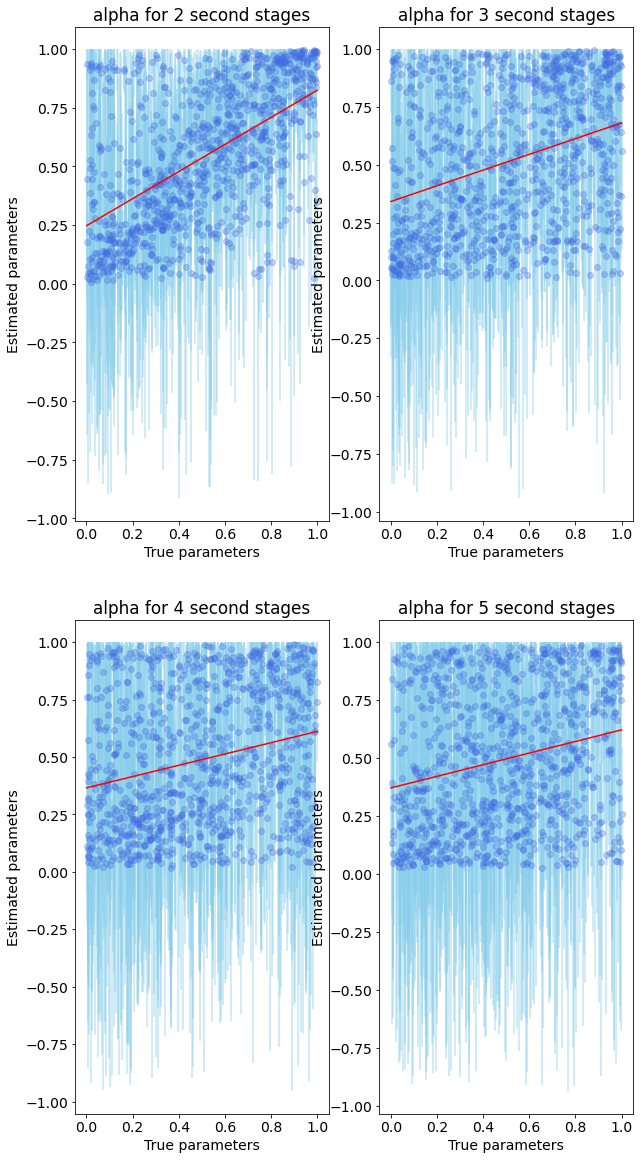

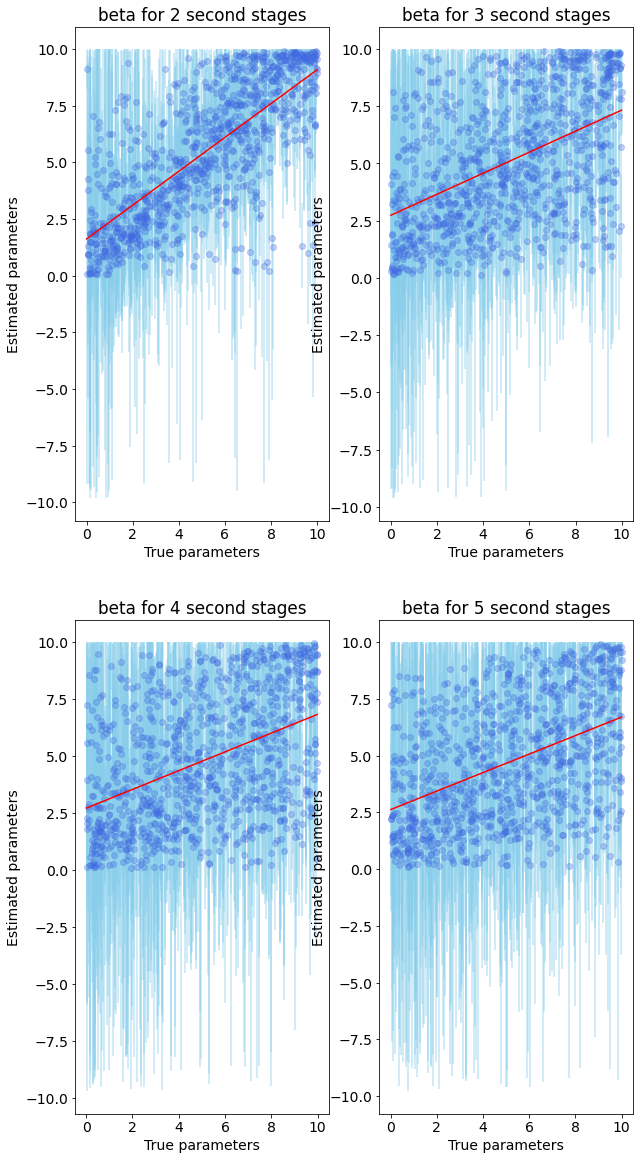

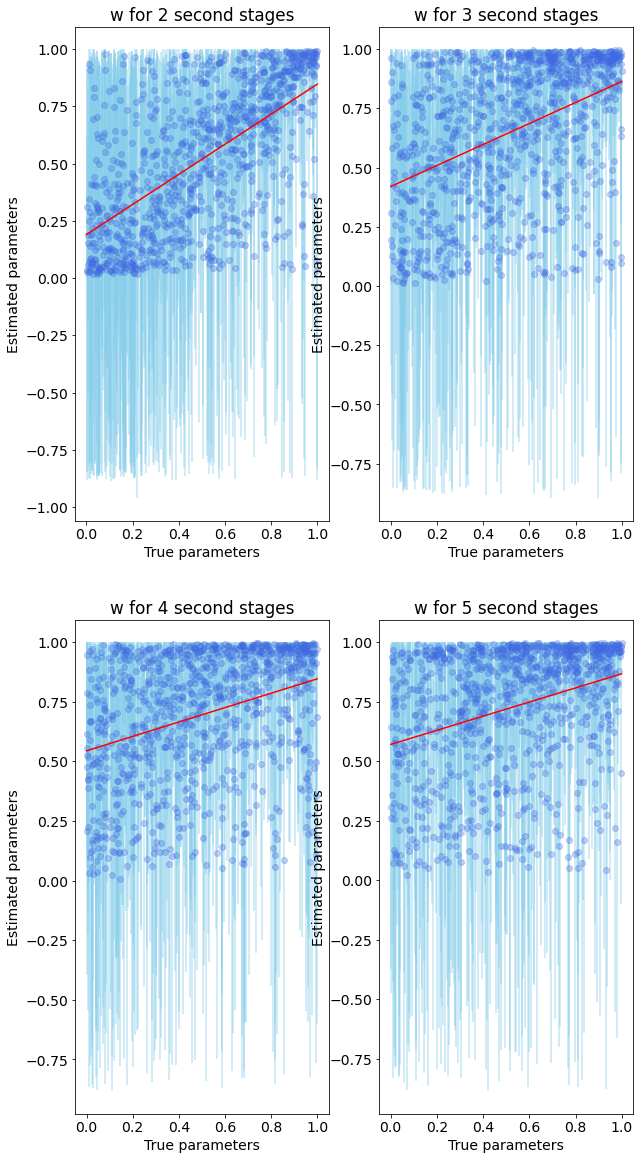

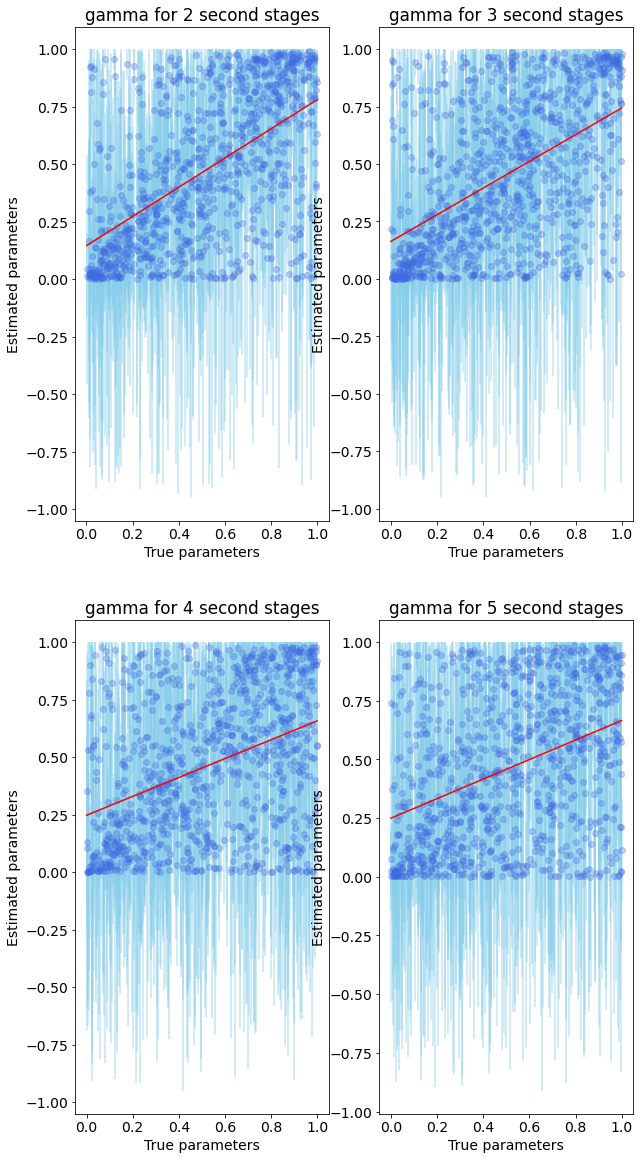

In [8]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']

for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(10,20), facecolor='w', edgecolor='k')
#     for second_stage in second_stages:
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'
#         file = 'recovery_results_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]

        num_data = len(corrtable)

        x = corrtable[:num_data,i*2]
        y = corrtable[:num_data,i*2+1]
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples

        # calculating the r2
        # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
        # Pearson's correlation coefficient
        numerator = np.sum((x - x_mean)*(y - y_mean))
        denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
        correlation_coef = numerator / denominator
        r2 = correlation_coef**2

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )

        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})
#         fig = plt.figure()
#         ax = fig.add_axes([.1, .1, 1, 1])

        
    
    
        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')
        # ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
        # ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

        # ax.errorbar(x,y,yerr=[y-ci_lower, ci_upper-y],linestyle='',color='skyblue', alpha=.3)
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')
        
        print("The correlation coefficient for {} {} stages: {}".format(parameter, second_stages[s], np.round(r2,2)))


# plt.subplots_adjust(wspace=1, hspace=2)

# 2. Just adding counterfactual

The correlation coefficient for alpha 2 stages: 0.39
The correlation coefficient for alpha 3 stages: 0.09
The correlation coefficient for alpha 4 stages: 0.05
The correlation coefficient for alpha 5 stages: 0.03
The correlation coefficient for beta 2 stages: 0.58
The correlation coefficient for beta 3 stages: 0.21
The correlation coefficient for beta 4 stages: 0.14
The correlation coefficient for beta 5 stages: 0.15
The correlation coefficient for w 2 stages: 0.36
The correlation coefficient for w 3 stages: 0.21
The correlation coefficient for w 4 stages: 0.15
The correlation coefficient for w 5 stages: 0.14
The correlation coefficient for gamma 2 stages: 0.12
The correlation coefficient for gamma 3 stages: 0.14
The correlation coefficient for gamma 4 stages: 0.16
The correlation coefficient for gamma 5 stages: 0.12


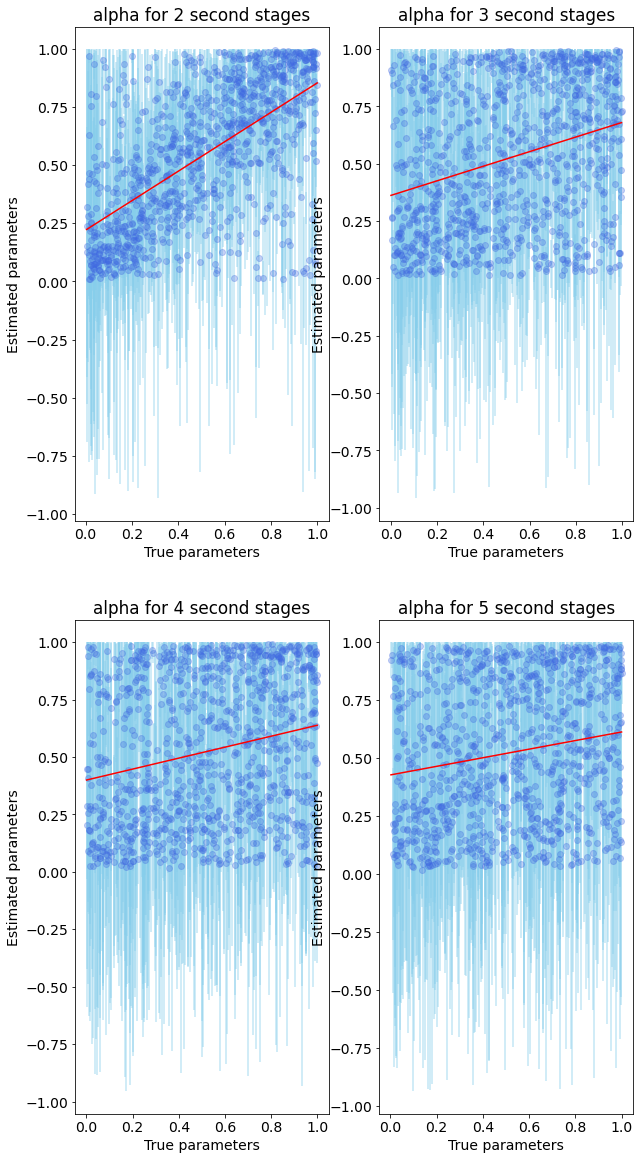

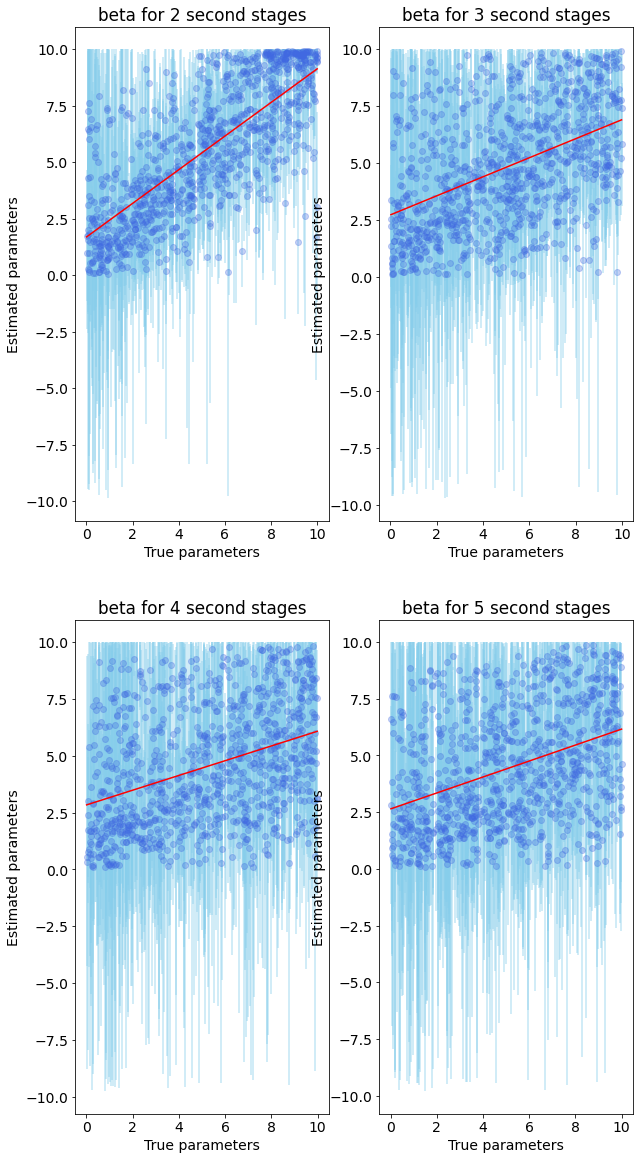

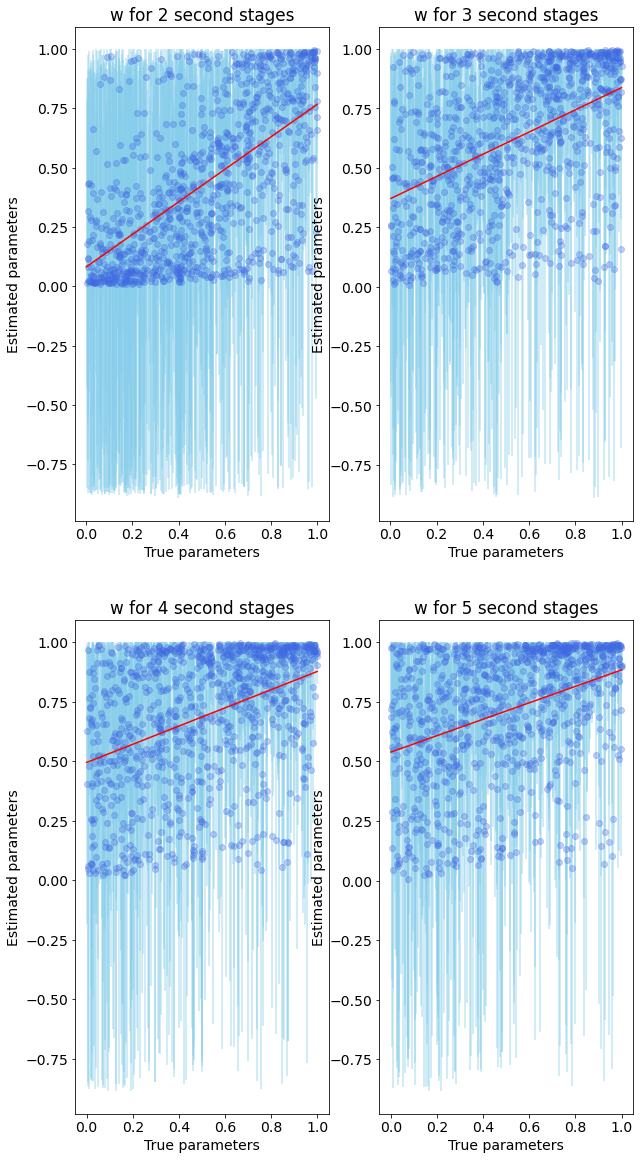

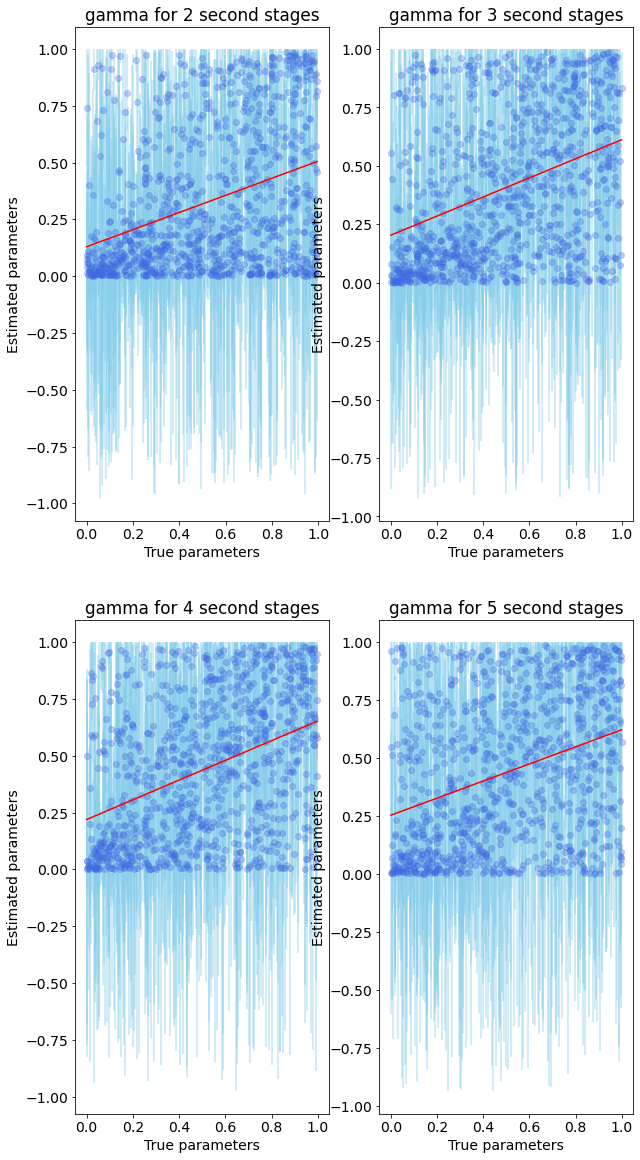

In [10]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']

for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(10,20), facecolor='w', edgecolor='k')
#     for second_stage in second_stages:
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_counterfactual_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'
#         file = 'recovery_results_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]

        num_data = len(corrtable)

        x = corrtable[:num_data,i*2]
        y = corrtable[:num_data,i*2+1]
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples

        # calculating the r2
        # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
        # Pearson's correlation coefficient
        numerator = np.sum((x - x_mean)*(y - y_mean))
        denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
        correlation_coef = numerator / denominator
        r2 = correlation_coef**2

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )

        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})
#         fig = plt.figure()
#         ax = fig.add_axes([.1, .1, 1, 1])

        
    
    
        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')
        # ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
        # ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

        # ax.errorbar(x,y,yerr=[y-ci_lower, ci_upper-y],linestyle='',color='skyblue', alpha=.3)
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')
        
        print("The correlation coefficient for {} {} stages: {}".format(parameter, second_stages[s], np.round(r2,2)))


# plt.subplots_adjust(wspace=1, hspace=2)

# 3. Just adding more trials (nC2 * 200 for n second-stages; so 200 for 2, 600 for 3, 1200 for 4, 2000 for 5 second stages)

The correlation coefficient for alpha 2 stages: 0.43
The correlation coefficient for alpha 3 stages: 0.2
The correlation coefficient for alpha 4 stages: 0.16
The correlation coefficient for alpha 5 stages: 0.15
The correlation coefficient for beta 2 stages: 0.68
The correlation coefficient for beta 3 stages: 0.26
The correlation coefficient for beta 4 stages: 0.25
The correlation coefficient for beta 5 stages: 0.25
The correlation coefficient for w 2 stages: 0.53
The correlation coefficient for w 3 stages: 0.28
The correlation coefficient for w 4 stages: 0.23
The correlation coefficient for w 5 stages: 0.18
The correlation coefficient for gamma 2 stages: 0.47
The correlation coefficient for gamma 3 stages: 0.35
The correlation coefficient for gamma 4 stages: 0.44
The correlation coefficient for gamma 5 stages: 0.43


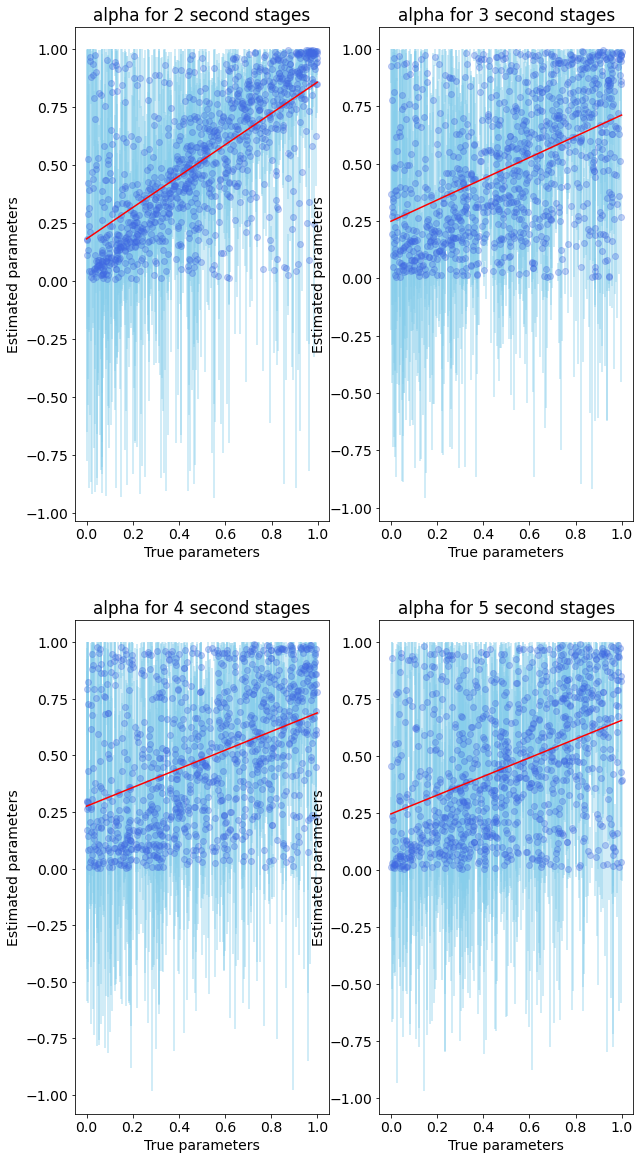

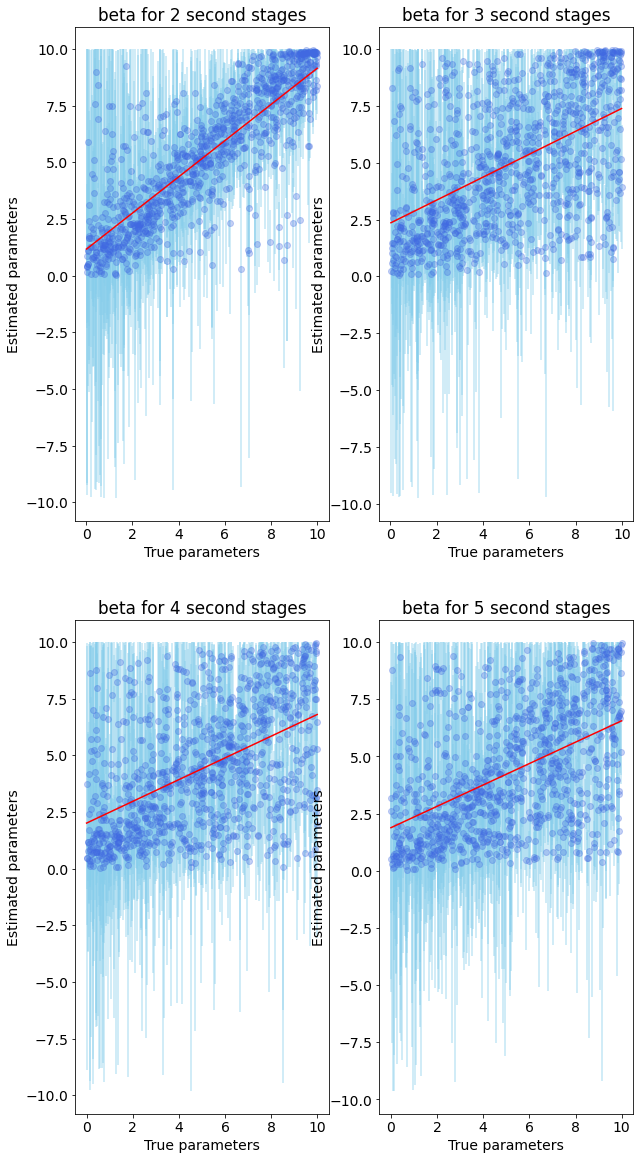

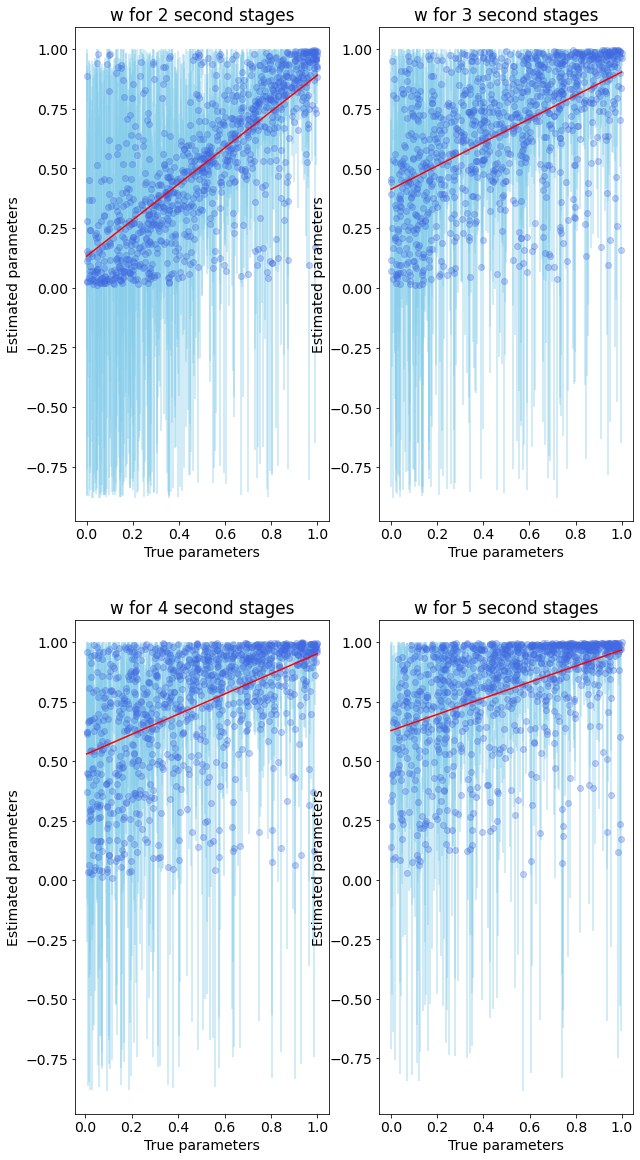

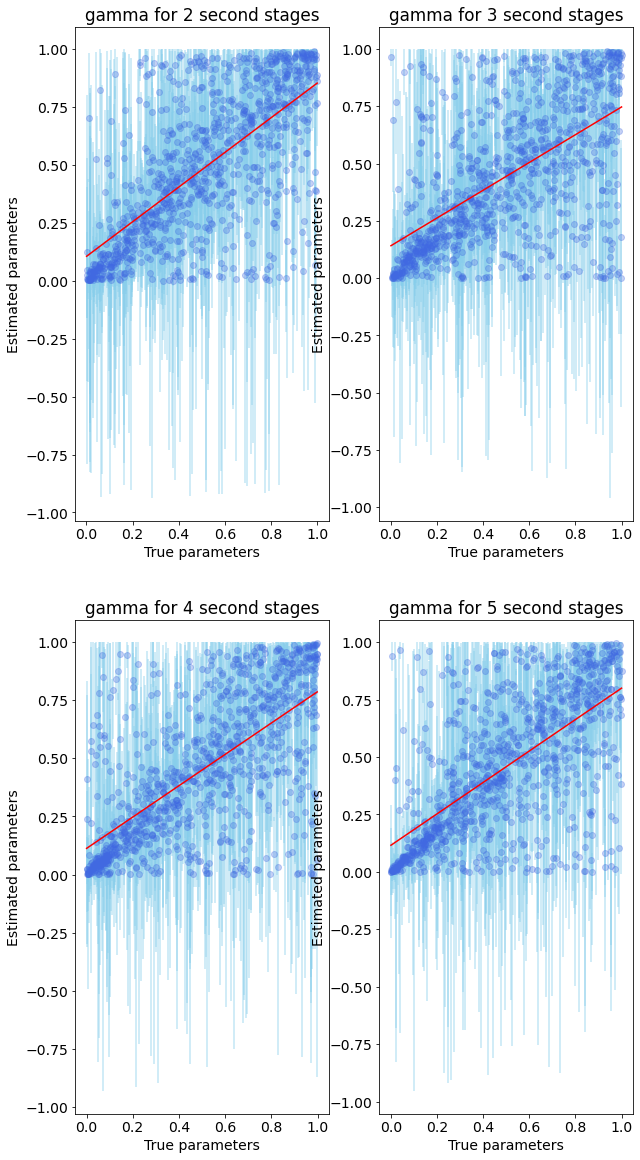

In [11]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']

for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(10,20), facecolor='w', edgecolor='k')
#     for second_stage in second_stages:
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_moretrials_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'
#         file = 'recovery_results_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]

        num_data = len(corrtable)

        x = corrtable[:num_data,i*2]
        y = corrtable[:num_data,i*2+1]
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples

        # calculating the r2
        # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
        # Pearson's correlation coefficient
        numerator = np.sum((x - x_mean)*(y - y_mean))
        denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
        correlation_coef = numerator / denominator
        r2 = correlation_coef**2

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )

        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})
#         fig = plt.figure()
#         ax = fig.add_axes([.1, .1, 1, 1])

        
    
    
        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')
        # ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
        # ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

        # ax.errorbar(x,y,yerr=[y-ci_lower, ci_upper-y],linestyle='',color='skyblue', alpha=.3)
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')
        
        print("The correlation coefficient for {} {} stages: {}".format(parameter, second_stages[s], np.round(r2,2)))


# plt.subplots_adjust(wspace=1, hspace=2)

# 4. Both: more trials and counterfactual

The correlation coefficient for alpha 2 stages: 0.48
The correlation coefficient for alpha 3 stages: 0.21
The correlation coefficient for alpha 4 stages: 0.15
The correlation coefficient for alpha 5 stages: 0.13
The correlation coefficient for beta 2 stages: 0.66
The correlation coefficient for beta 3 stages: 0.22
The correlation coefficient for beta 4 stages: 0.17
The correlation coefficient for beta 5 stages: 0.16
The correlation coefficient for w 2 stages: 0.52
The correlation coefficient for w 3 stages: 0.33
The correlation coefficient for w 4 stages: 0.23
The correlation coefficient for w 5 stages: 0.15
The correlation coefficient for gamma 2 stages: 0.17
The correlation coefficient for gamma 3 stages: 0.26
The correlation coefficient for gamma 4 stages: 0.35
The correlation coefficient for gamma 5 stages: 0.37


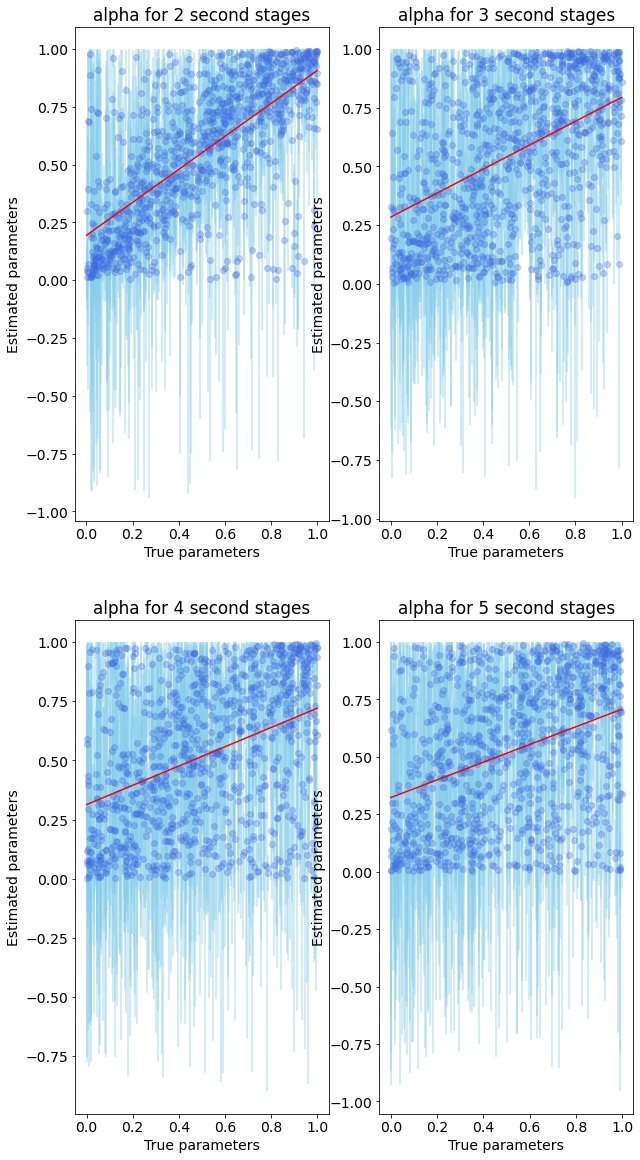

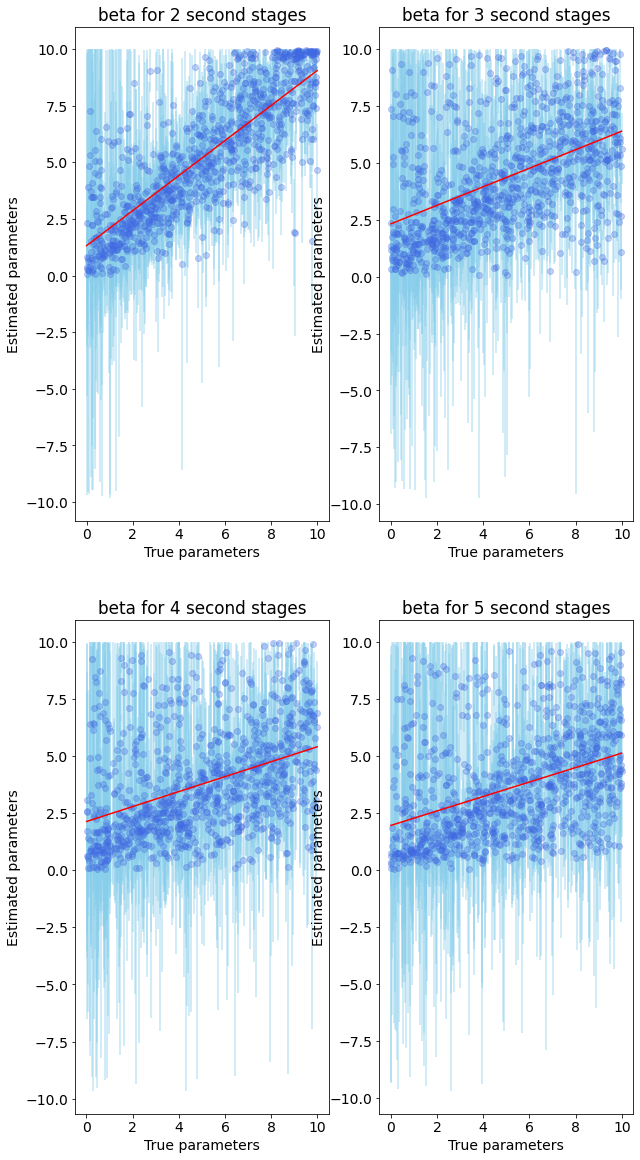

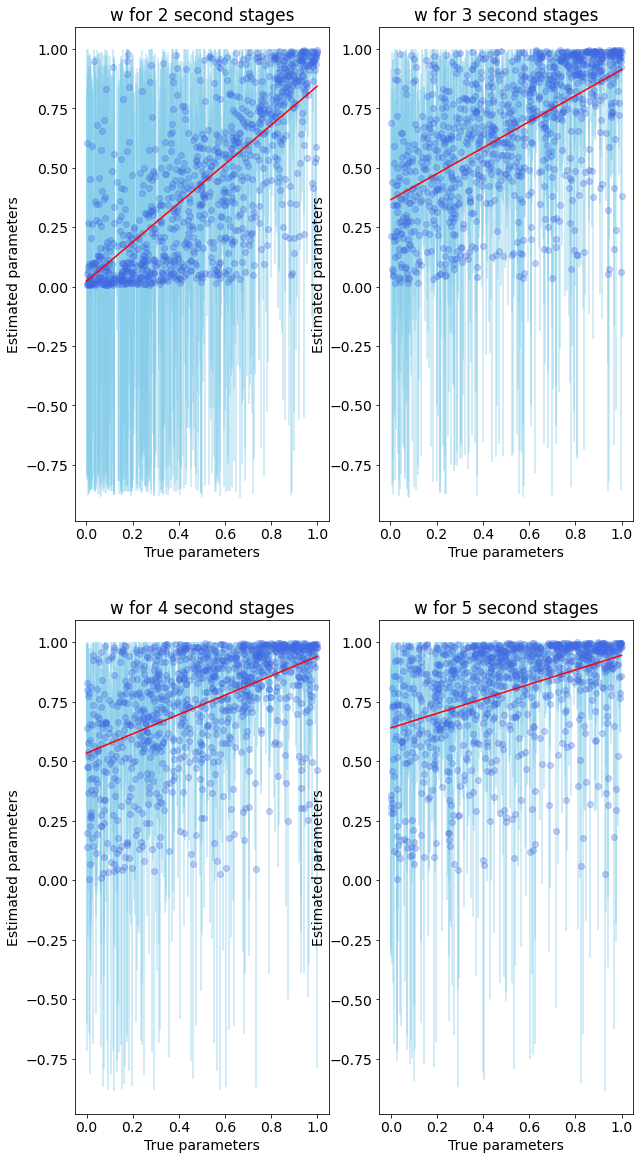

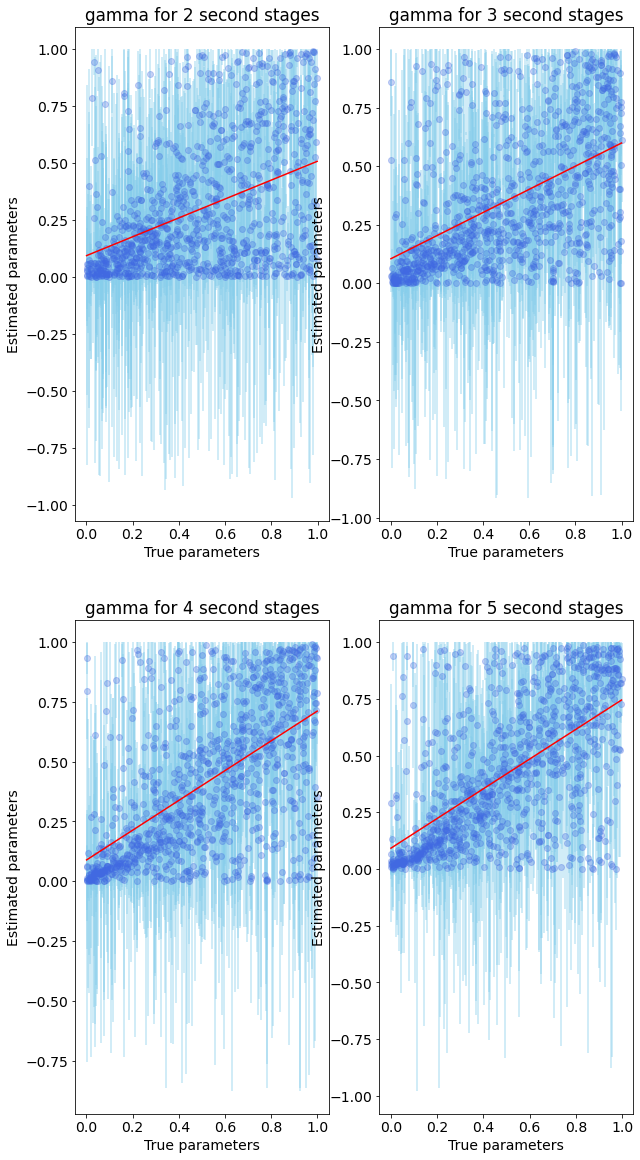

In [12]:
second_stages = [2,3,4,5]
parameters = ['alpha', 'beta', 'w', 'gamma']

for i, parameter in enumerate(parameters):
    fig, axs = plt.subplots(2,2, figsize=(10,20), facecolor='w', edgecolor='k')
#     for second_stage in second_stages:
    for s, ax in zip(range(len(second_stages)), axs.flat):
        file = 'recovery_counterfactual_and_moretrials_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'
#         file = 'recovery_results_' + str(second_stages[s]) + 'states_4params_nrits1000.mat'

        curr_file = io.loadmat(file)
        CI_table = curr_file['data']['CI_table']
        CI_table = np.asarray(CI_table)[0][0]
        corrtable = curr_file['data']['corrtable']
        corrtable = np.asarray(corrtable)[0][0]

        num_data = len(corrtable)

        x = corrtable[:num_data,i*2]
        y = corrtable[:num_data,i*2+1]
        ci_upper = CI_table[:num_data,i*2]
        ci_lower = CI_table[:num_data,i*2+1]

        slope, intercept = np.polyfit(x,y,1) # linear model adjustment
        y_model = np.polyval([slope, intercept], x)   # modeling...

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        n = x.size                        # number of samples

        # calculating the r2
        # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
        # Pearson's correlation coefficient
        numerator = np.sum((x - x_mean)*(y - y_mean))
        denominator = ( np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2) )**.5
        correlation_coef = numerator / denominator
        r2 = correlation_coef**2

        # mean squared error
        MSE = 1/n * np.sum( (y - y_model)**2 )

        # to plot the adjusted model
        x_line = np.linspace(np.min(x), np.max(x), 100)
        y_line = np.polyval([slope, intercept], x_line)

        ############### Ploting
        plt.rcParams.update({'font.size': 14})
#         fig = plt.figure()
#         ax = fig.add_axes([.1, .1, 1, 1])

        
    
    
        title_name = parameter + ' for ' + str(second_stages[s]) + ' second stages'
        ax.set_title(title_name)
        ax.plot(x, y, 'o', color = 'royalblue', alpha=0.3)
        ax.plot(x_line, y_line, color = 'red')
        # ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
        # ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

        # ax.errorbar(x,y,yerr=[y-ci_lower, ci_upper-y],linestyle='',color='skyblue', alpha=.3)
        ax.errorbar(x,y,yerr=ci_upper-y,linestyle='',color='skyblue', alpha=.5)

        ax.set_xlabel('True parameters')
        ax.set_ylabel('Estimated parameters')
        
        print("The correlation coefficient for {} {} stages: {}".format(parameter, second_stages[s], np.round(r2,2)))


# plt.subplots_adjust(wspace=1, hspace=2)

# Summary

1. $\alpha$ = learning rate (0 < $\alpha$ < 1)
2. $\beta$ = inverse temperature (0 < $\beta$ < 10)
3. $w$ = model-based vs. model-free (0 < $w$ < 1)
4. $\gamma$ = decay rate (0 < $\gamma$ < 1)

Parameter | n stages | 1. Baseline | 2. Counterfactual | 3. More trials | 4. Both
:---------|:--------:|-------------|-------------------|----------------|-----------:
**$\alpha$** |   2    | 0.32   |  0.39 | 0.43 | **0.48**
 |   3    | 0.11   | 0.09 | 0.2 | **0.21**
 |   4    | 0.06   | 0.05 | **0.16** | 0.15
 |   5    | 0.05   | 0.03 | **0.15** | 0.13
**$\beta$** |   2    | 0.55   | 0.58 | **0.68** | 0.66
 |   3    | 0.23   | 0.21 | **0.26** | 0.22
 |   4    | 0.19   | 0.14 | **0.25** | 0.17
 |   5    | 0.2   | 0.15 | **0.25** | 0.16
**$w$** |   2    | 0.38   | 0.36 | **0.53** | 0.52
 |   3    | 0.19   | 0.21 | 0.28 | **0.33**
 |   4    | 0.11   | 0.15 | **0.23** | **0.23**
 |   5    | 0.1   | 0.14 | **0.18** | 0.15
**$\gamma$** |   2    | 0.32   | 0.12 | **0.47** | 0.17
 |   3    | 0.27   | 0.14 | **0.35** | 0.26
 |   4    | 0.15   | 0.16 | **0.44** | 0.35
 |   5    | 0.15   | 0.12 | **0.43** | 0.37